In [1]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.patches import FancyArrowPatch
#from mpl_toolkits.mplot3d import proj3d
import numpy as np
import math

Here we try to generate our own distribution with our own pseudo random generator. The function accepts the seed, other parameters for a linear congruential generator, so as to attain a set of random data points. 

This is done 4 times, each with different parameters. Keeping in mind, the way a linear congruential generator works, its parameters have been tuned so as to trying to attain a univariate normal distribution

In [2]:
def genDistribution(x_value,c,m,num_iterations,desiredMean,desiredVariance):   
  a = 101427               
  X = np.empty(num_iterations)
  pdf = np.empty(num_iterations)
  distributionVariance1=0

  for counter in range(num_iterations):
      x_value = (a * x_value + c) % m
      X[counter] = x_value
    
  distributionMean1 = np.sum(X)/len(X)
    
  for j in range(num_iterations):
      distributionVariance1 = distributionVariance1+((distributionMean1 - X[j])**2)/len(X) 

  X.sort()

  for counter in range(num_iterations):
    pdf[counter] = (1/((distributionVariance1*4*9.877551)**0.5))*math.exp(-((X[counter]-distributionMean1)**2)/(2*distributionVariance1))
  
  X = Normalize(X,distributionMean1,distributionVariance1,desiredMean,desiredVariance)
  plt.plot(X,pdf)
  plt.xlabel("X")
  plt.ylabel("PDF(X)")
  return X

The distribution attained is normalized to a standard distribution with mean = 0, and variance = 1. 

The function also accepts parameters for the desired mean and desired variance, so as transforming our random variables to attain a distribution with the desired parameters. 

In [3]:
def Normalize(x,mean,variance,desiredMean,desiredVariance):
  z = np.zeros(len(x))
  for i in range(len(x)):
    z[i] = ((x[i]-mean)/math.sqrt(variance))
    z[i] = (z[i]*desiredVariance + desiredMean)
  #print(((int)(np.sum(z)/(len(x)))))
  return z


The following function generates a Bivariate pdf for two given univariate normal distributions. 

In [4]:
def Bivariate(z1,z2,meanX,meanY,sigmaDesX,sigmaDesY):
  uX = meanX
  uY = meanY
  sigmaX = sigmaDesX
  sigmaY = sigmaDesY
  
  pdf = np.empty(len(z1))

  for i in range(len(z1)):
    q = (((z1[i]**2)/(sigmaX**2)) + ((z2[i]**2)/(sigmaY**2))) * 0.5
    c = 1/(2*math.pi)
    pdf[i] = c * math.exp(-q)
  
  #print(pdf)
  return pdf


I have generated 4 univariate distributions: x1,y1,x2,y2
Next I have plotted each one of them with their probability functions to find the similarity between their curves and a bell-shaped curve for a normal distribution. 

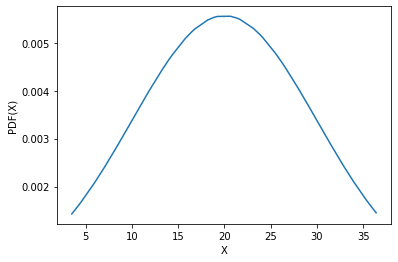

In [5]:
#Class 1 represented by (X1, X2)
x1 = genDistribution(123456789.0,13,98,200,20,10)

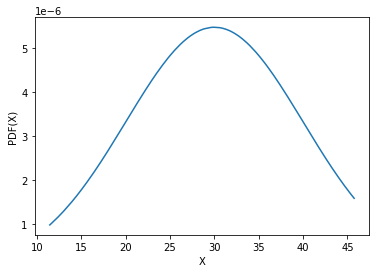

In [6]:
y1 = genDistribution(567894321.0,321,100000,200,30,10)

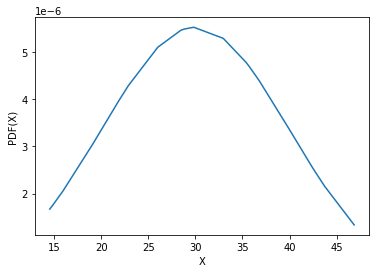

In [7]:
x2 = genDistribution(25000,7000,100000,200,30,10)

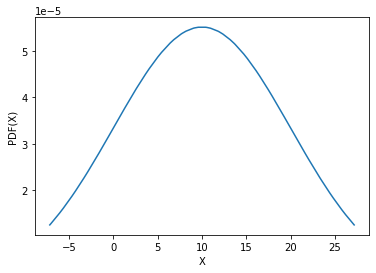

In [8]:
y2 = genDistribution(10480,15000,10000,200,10,10)

In [9]:

pdf = np.zeros((2,200))
pdf[0] = Bivariate(x1,y1,200,30,10,30)
pdf[1] = Bivariate(x2,y2,200,20,30,30)

#print(pdf)


I have used two kinds of multivariate distributions, one with the method I described above, while other with an inbuild numpy method. This had been done for perceptron training and testing purposes only. You may note that the perceptron is able to learn from both kinds of distributions. It's learning algorithm and analysis will be discussed in later sections of the code.

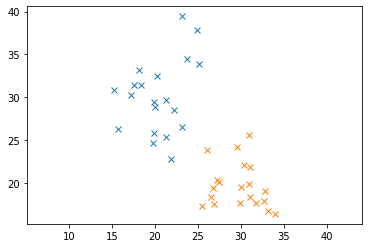

"\nFor 3d plotting of the joint pdf\nThe graph wasn't coming out to be conclusive due to some issue in probably the Bivariate function.\n\nfig = plt.figure()\nax = plt.axes(projection='3d')\n\nax.plot_surface(x1, y1, pdf, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)\nplt.show()\n"

In [10]:
mean1 = [20, 30]
cov1 = [[10, 0], [0, 10]]
mean2 = [30, 20]
cov2 = [[10, 0], [0, 10]]

x1, y1 = np.random.multivariate_normal(mean1, cov1, 20).T
plt.plot(x1, y1, 'x')
plt.axis('equal')

x2, y2 = np.random.multivariate_normal(mean2, cov2, 20).T
plt.plot(x2, y2, 'x')
plt.axis('equal')
plt.show()

pdf = np.zeros((2,20))

pdf[0] = Bivariate(x1,y1,20,30,10,10)
pdf[1] = Bivariate(x2,y2,30,10,10,10)
"""
For 3d plotting of the joint pdf
The graph wasn't coming out to be conclusive due to some issue in probably the Bivariate function.

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x1, y1, pdf, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
plt.show()
"""

In [11]:
"""
This is the activation function which determines what would be our 
Y_hat or predited Y based on the current weights.

"""
def Activation(G,Y_hat,m):
  #print(Y_hat)
  i = 0
  while i < 2*m:
    temp = G[0][i]
    if temp > 0 :
      Y_hat[0][i] = 1
    else:
      Y_hat[0][i] = -1
    i = i + 1
  return Y_hat

Here the training of the perceptron takes place.
The accuracy is printed after every 500 iterations. Based on the learning rate and the separability of the distributions, we get our required classifier and accuracies.

Accuracy:  0.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0


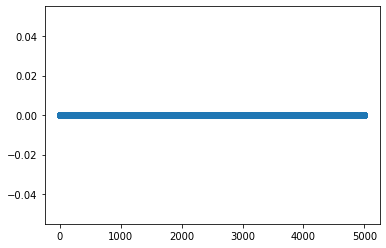

In [12]:
m = len(x1)
X = np.zeros((2,2*m))
Y = np.zeros((1,2*m))
Y_hat = np.zeros((1,2*m))
G = np.zeros((1,2*m))
Weight = np.zeros((1,2)) 
bias = np.zeros((1,2*m)) 

X[0][:m] = x1
X[0][m:] = x2

X[1][:m] = y1
X[1][m:] = y2

Y[0][:m] = 1
Y[0][m:] = -1


dz = np.zeros((1,2*m))
alpha = 0.05

iterations = 5000
trainAccuracy = np.zeros(iterations)

for t in range(iterations):                         
    G = np.dot(Weight,X) + bias
    if t % 500 == 0:
      print("Accuracy: ",(np.sum(Y_hat==Y)/(2*m)))
    Y_hat = Activation(G,Y_hat,m)
    dz = Y_hat-Y
    dw = (np.dot(dz,X.T))/(2*m)
    db = (1/(2*m))*dz
    Weight = Weight - alpha*dw
    bias = bias - alpha*db                

Value = np.zeros(iterations)
for i in range(iterations):
  Value[i] = i
G = np.dot(Weight,X) + bias
plt.scatter(Value,trainAccuracy)
plt.plot(Value,trainAccuracy)
plt.show()

This section of the code is for visualizing our classifier. I have plotted our classifier with the final weights and bias by forming the equation of the hyperplane (here a line)

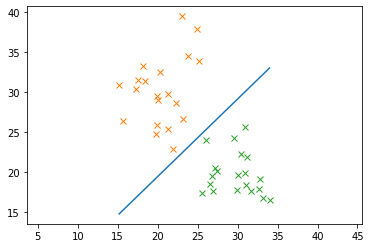

In [13]:
tempWeight = Weight[0]
tempBias = bias[0]
temp = G[0]
temp_dash = G[0] - bias[0]


temp_X1 = np.zeros(2)
tempX1 = np.zeros(2*m)
tempX1 = X[0] 
temp_X1[0] = min(X[0])
temp_X1[1] = max(X[0])

temp_bias = np.zeros(2)
temp_bias[0] = tempBias[np.argmin(X[0])]
temp_bias[1] = tempBias[np.argmax(X[0])]
 


plt.plot(temp_X1,-1*(temp_X1*tempWeight[0] + temp_bias)/tempWeight[1])
plt.plot(x1, y1,"x")
plt.axis('equal')
plt.plot(x2, y2,"x")
plt.axis('equal')
plt.show()

## Q2.(b):
The 3D-plots of the pdf for the joint distributions were attained but not like the way Bivariate Gaussian Distribution plots. This could be due to a number of reasons, the primary one of which could be some logical error in the Bivariate function which I made. I took the correlation coefficient to be zero while evaluating the pdf's. This might be responsible for some sort of issue with the 3D plot.

However, what I noticed after playing with the univariate distribution graphs that I plotted and also while plotting the (x1,y1) and (x2,y2) in a 2D plane,that the plots would be linearly separable if there is some difference between the corresponding means of the two distributions. If the means of the distributions are same or have minimal difference, we won't get a linearly separable dataset.

Theoretically, after going through some resources, I could connect my observation with this. Let there be a vector

> D1 = [u1,u2] corresponding to (x1,y1)

> D2 = [u3,u4] corresponding to (x2, y3)

Then, if there exists a hyperplane which is perpendicular to the D1-D2, then the set is linearly separable, else it is not


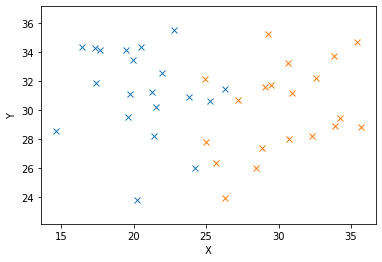

In [ ]:
mean1 = [20, 30]
cov1 = [[10, 0], [0, 10]]
mean2 = [30, 30]
cov2 = [[10, 0], [0, 10]]

x1, y1 = np.random.multivariate_normal(mean1, cov1, 20).T
plt.plot(x1, y1, 'x')
plt.axis('equal')

x2, y2 = np.random.multivariate_normal(mean2, cov2, 20).T
plt.plot(x2, y2, 'x')
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In the above graph, we can easily see that it a linear classifier won't be able to give a 100 percent accuracy. Note that the mean for y1 and y2 both are same.

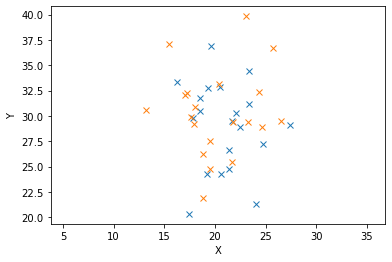

In [ ]:
mean1 = [20, 30]
cov1 = [[10, 0], [0, 10]]
mean2 = [20, 30]
cov2 = [[20, 0], [0, 20]]

x1, y1 = np.random.multivariate_normal(mean1, cov1, 20).T
plt.plot(x1, y1, 'x')
plt.axis('equal')

x2, y2 = np.random.multivariate_normal(mean2, cov2, 20).T
plt.plot(x2, y2, 'x')
plt.axis('equal')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In the above graph as well, the mean for both the distributions has been fixed as the same.
Even though they have different variances, they are clearly not linearly separable.

# Q2(c):
The linear regressor method works when we try to fit our given dataset on a hyperplane. In the problem given to us, we need to classify the two classes, so we linear regressor won't be a good option. However, if we were to be given some points of the hyperplane that could act as a linear classifier, then from there we can try to fit them on a hyperplane and it will then help us to fulfil the task. In other words, linear regressor itself won't be a good option,  but could help us out in a scenario where we have some decision boundary points.